# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Data Inspection

In [2]:
df = pd.read_csv('Shopping Data.csv')

In [69]:
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount,US_States,Size,Color,Season,ReviewRating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases_Quantity,Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [70]:
# Null Data Check
df.isnull().sum()

Customer_ID                    0
Age                            0
Gender                         0
Item_Purchased                 0
Category                       0
Purchase_Amount                0
US_States                      0
Size                           0
Color                          0
Season                         0
ReviewRating                   0
Subscription_Status            0
Shipping_Type                  0
Discount_Applied               0
Promo_Code_Used                0
Previous_Purchases_Quantity    0
Payment_Method                 0
Frequency_of_Purchases         0
dtype: int64

In [71]:
df.describe()

,Customer_ID,Age,Purchase_Amount,ReviewRating,Previous_Purchases_Quantity
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [72]:
df.dtypes

Customer_ID                      int64
Age                              int64
Gender                          object
Item_Purchased                  object
Category                        object
Purchase_Amount                  int64
US_States                       object
Size                            object
Color                           object
Season                          object
ReviewRating                   float64
Subscription_Status             object
Shipping_Type                   object
Discount_Applied                object
Promo_Code_Used                 object
Previous_Purchases_Quantity      int64
Payment_Method                  object
Frequency_of_Purchases          object
dtype: object

# Data Visualisations

In [36]:
print(df.groupby('Gender')['Purchase_Amount'].mean())

Gender
Female    60.249199
Male      59.536199
Name: Purchase_Amount, dtype: float64


In [37]:
print(df['Promo_Code_Used'].value_counts(normalize=True) * 100)

Promo_Code_Used
No     57.0
Yes    43.0
Name: proportion, dtype: float64


### Age Distribution of Customers

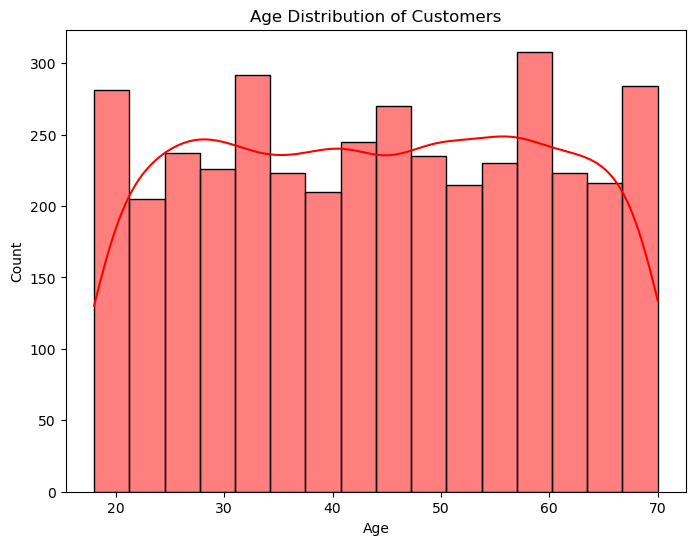

In [28]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True, color = 'red')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Purchase Amount Distribution

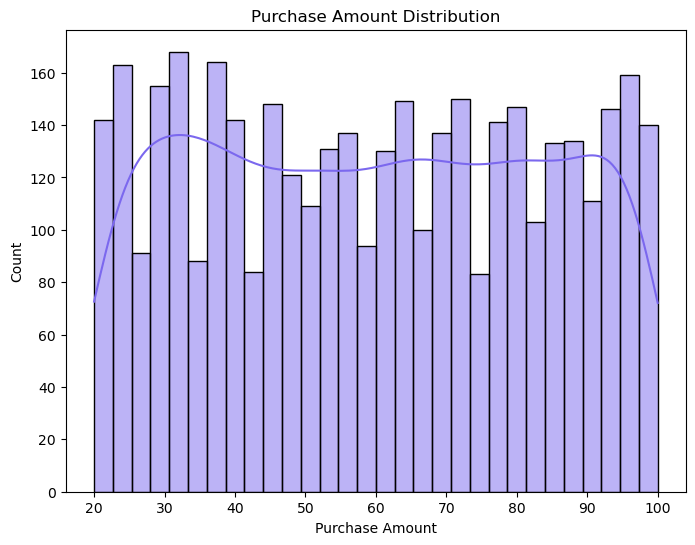

In [42]:
# Purchase Amount Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Purchase_Amount', bins=30, color = 'mediumslateblue', kde=True)
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.show()

### Gender Distribution

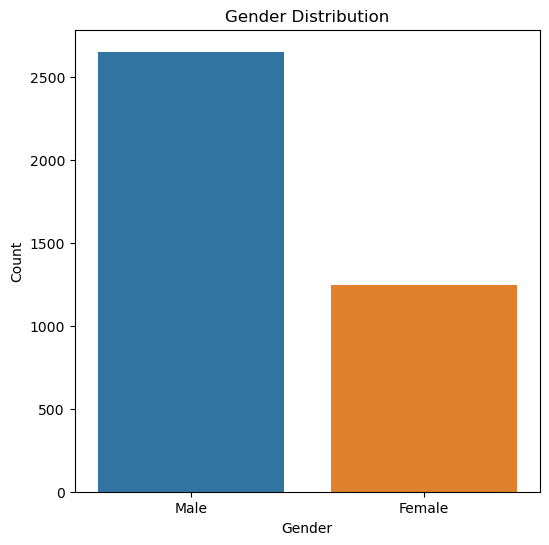

In [44]:
# Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Item Purchased Distribution

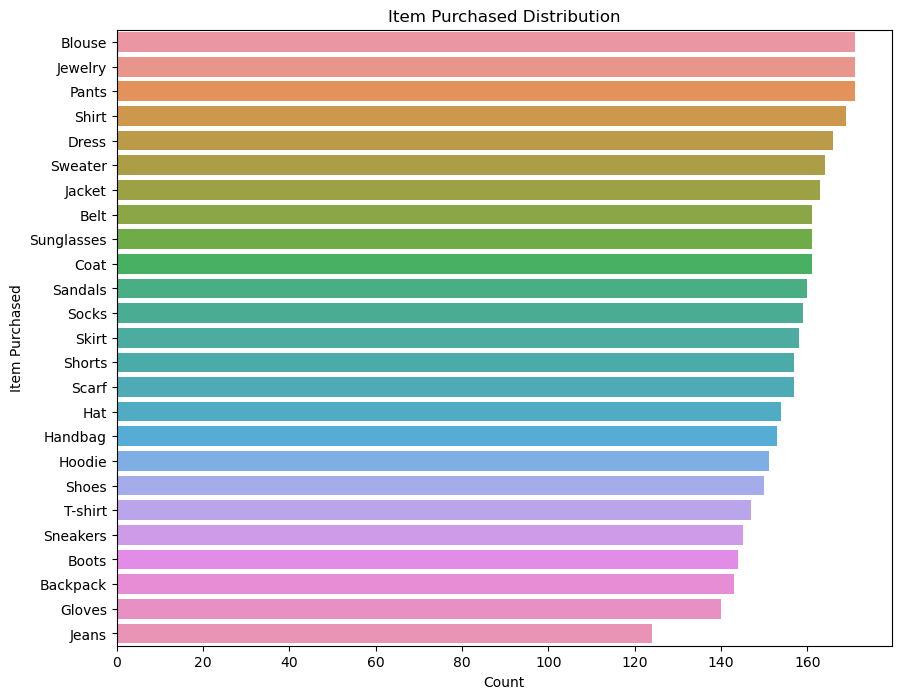

In [45]:
# Item Purchased Distribution
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='Item_Purchased', order=df['Item_Purchased'].value_counts().index)
plt.title('Item Purchased Distribution')
plt.xlabel('Count')
plt.ylabel('Item Purchased')
plt.show()

### Correlation Heatmap 

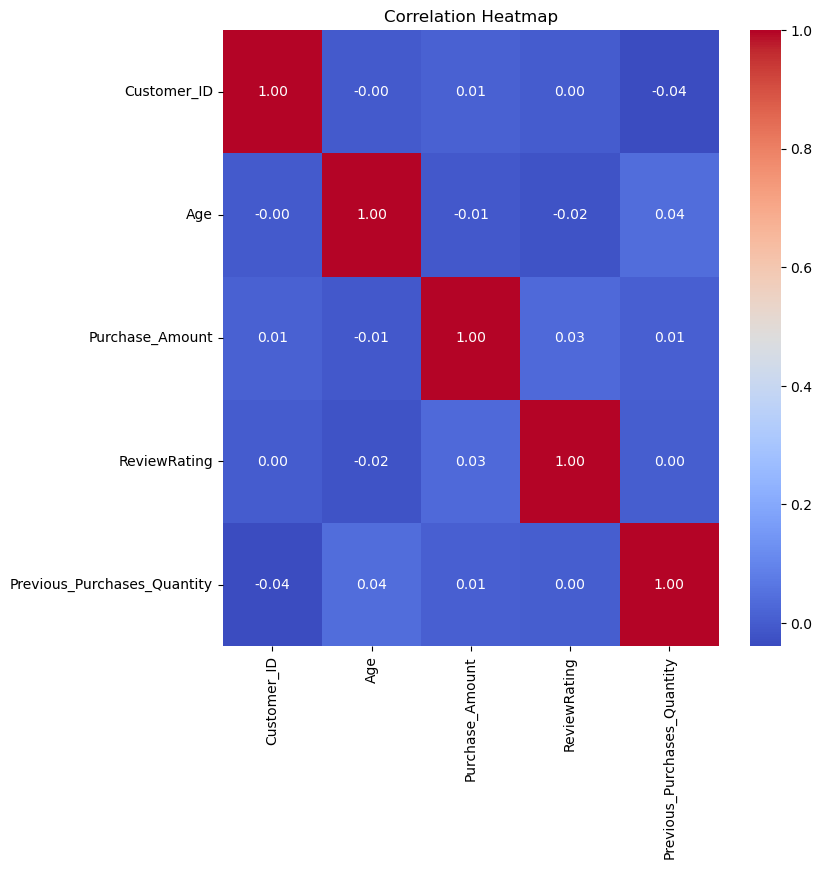

In [24]:
# Correlation Heatmap for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Payment Method Distribution

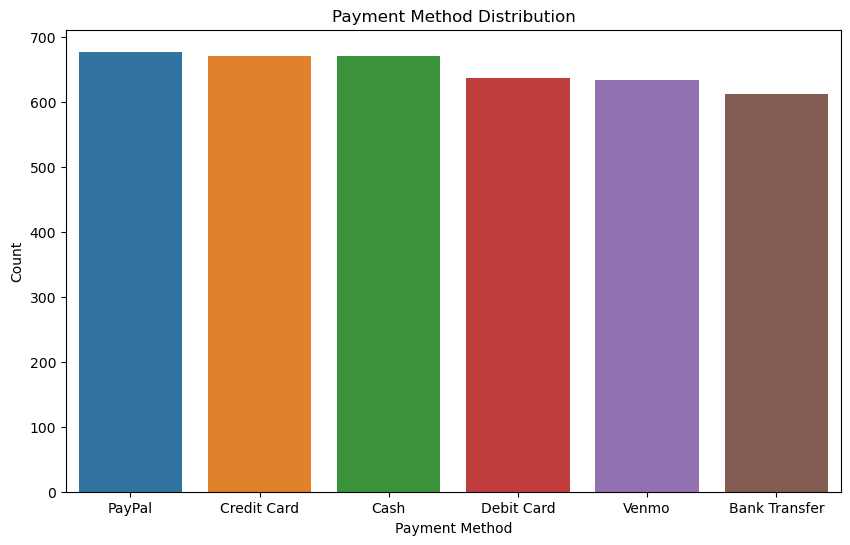

In [49]:
# Payment Method Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_Method', order=df['Payment_Method'].value_counts().index)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

### Review Ratings Distribution

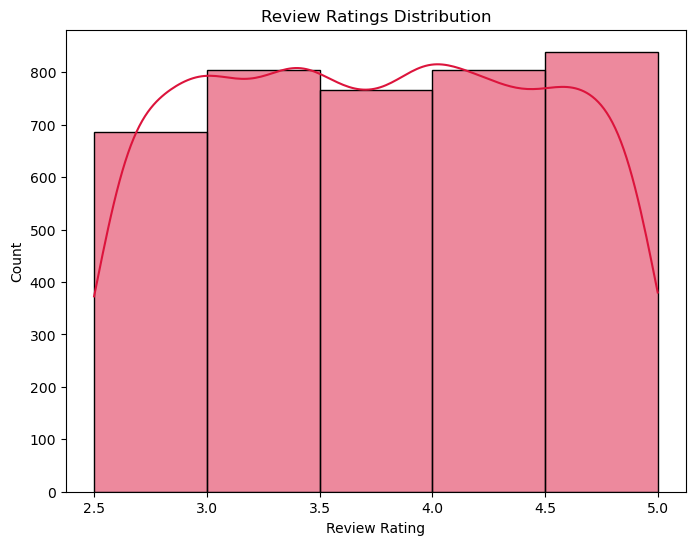

In [7]:
# Review Ratings Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='ReviewRating', bins=5, kde=True, color = 'crimson')
plt.title('Review Ratings Distribution')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()

### Shipping Type Distribution

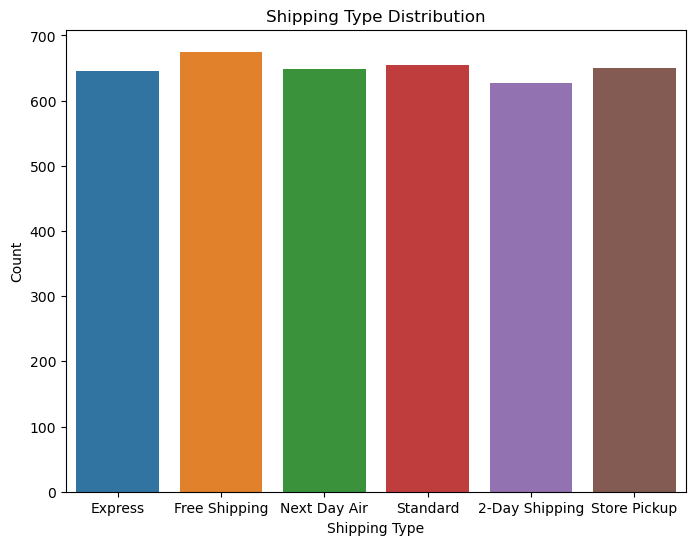

In [51]:
# Shipping Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Shipping_Type')
plt.title('Shipping Type Distribution')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.show()

### Frequency of Purchases Distribution

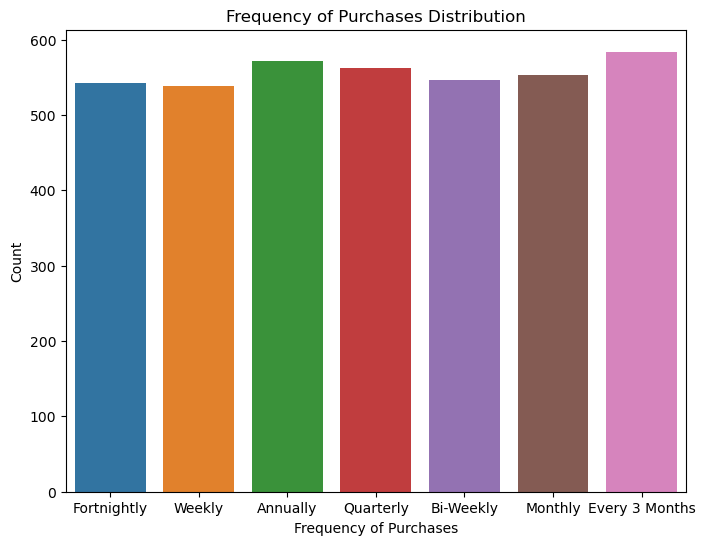

In [52]:
# Frequency of Purchases Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Frequency_of_Purchases')
plt.title('Frequency of Purchases Distribution')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.show()

### Purchase Amount vs. Review Rating

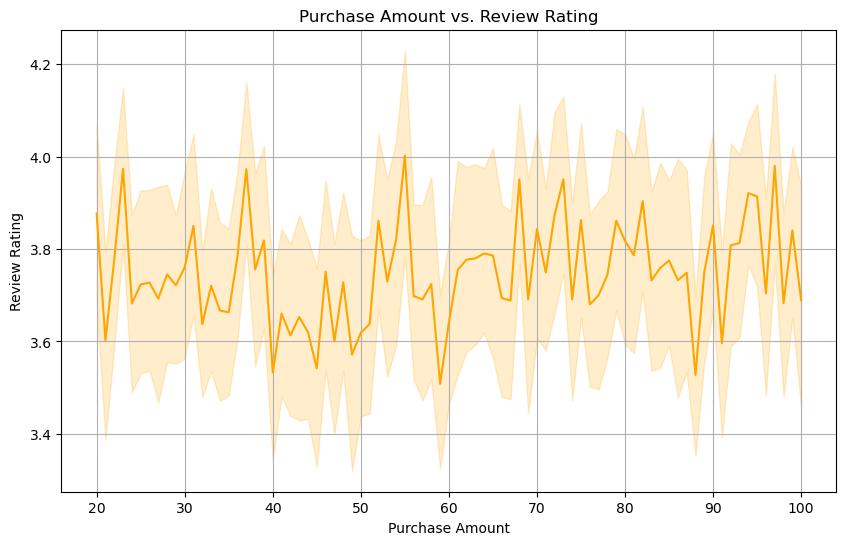

In [55]:
# Purchase Amount vs. Review Rating
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Purchase_Amount', y='ReviewRating', color = 'orange')
plt.title('Purchase Amount vs. Review Rating')
plt.xlabel('Purchase Amount')
plt.ylabel('Review Rating')
plt.grid(True)
plt.show()

### Average Purchase Amount by Age

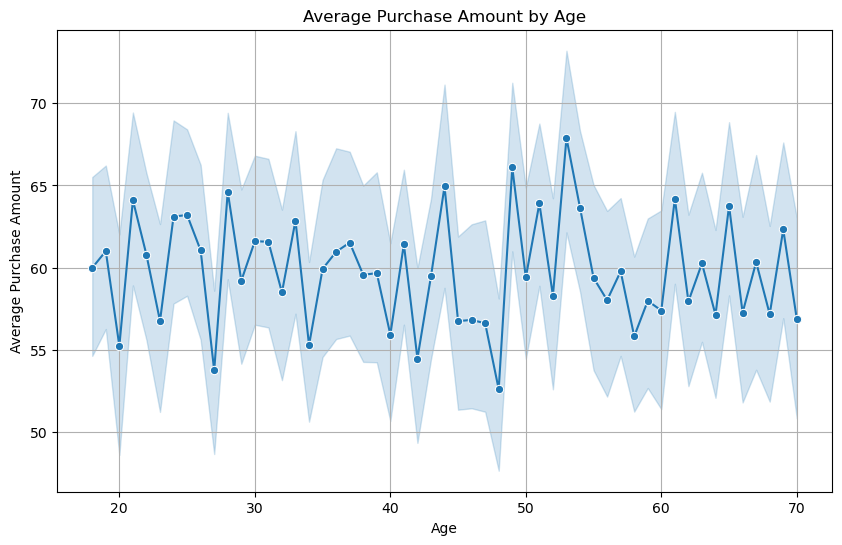

In [56]:
# Line Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='Purchase_Amount', marker='o')
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.grid(True)
plt.show()

### Customers by States

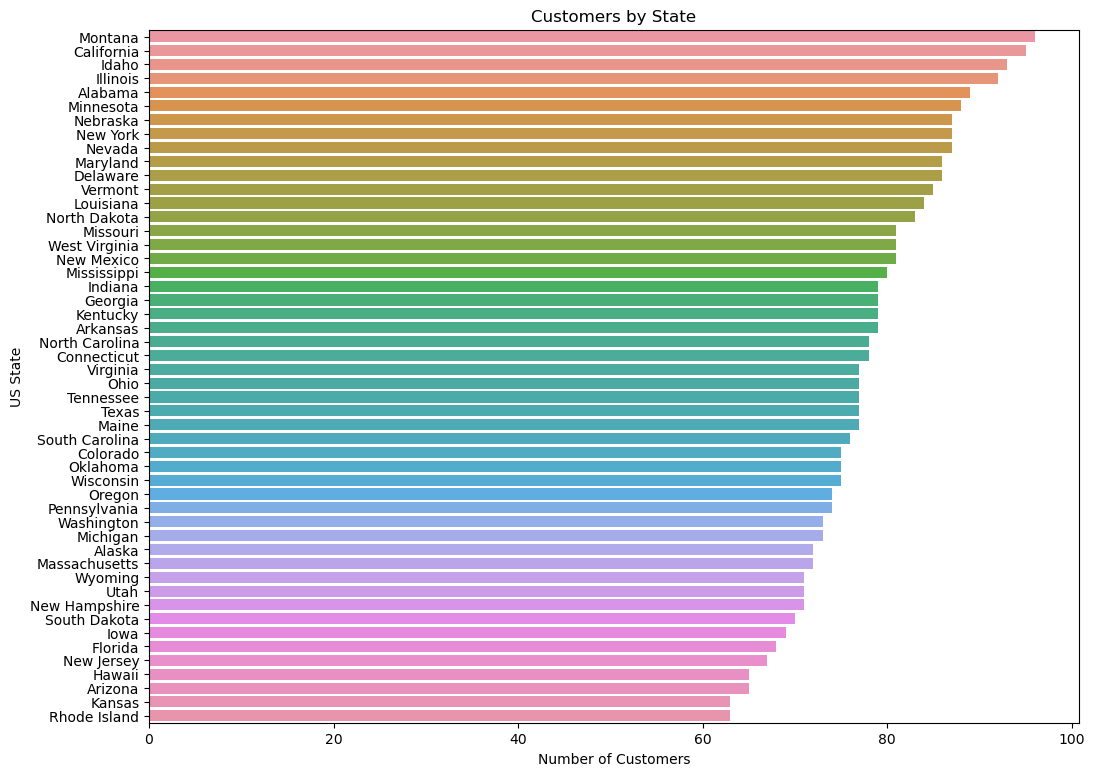

In [25]:
# Customers by Every US State
state_counts = df['US_States'].value_counts()

plt.figure(figsize=(12,9))
sns.barplot(x=state_counts.values, y=state_counts.index)
plt.title('Customers by State')
plt.xlabel('Number of Customers')
plt.ylabel('US State')
plt.show()

### Purchase Amount by US States (Boxplot)

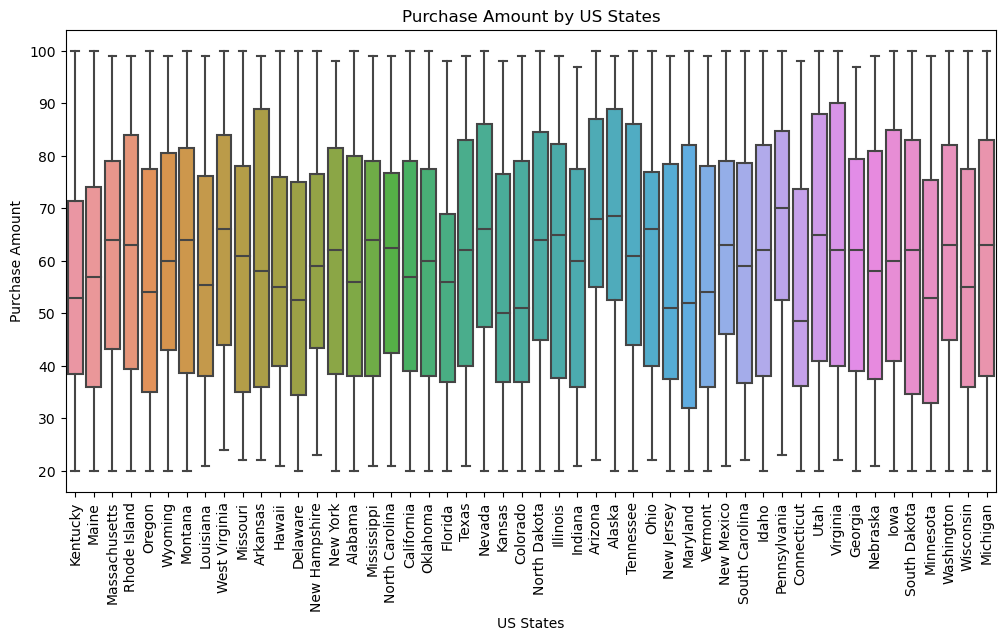

In [58]:
# Purchase Amount by US States {Boxplot}
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='US_States', y='Purchase_Amount')
plt.title('Purchase Amount by US States')
plt.xlabel('US States')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=90)
plt.show()

### Average Purchase Amount by US States (Line Graph)

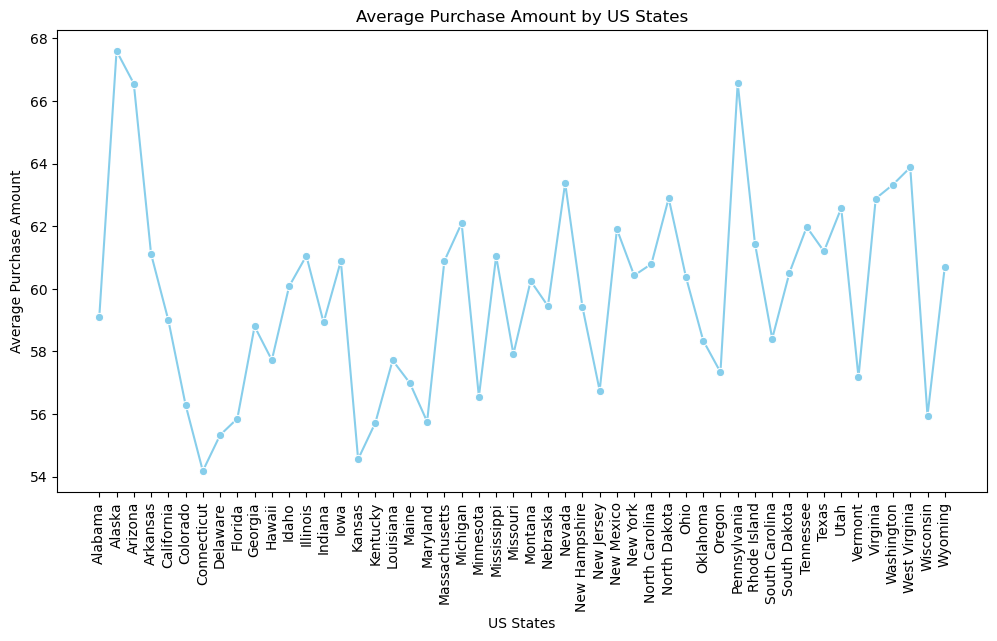

In [74]:
# Average Purchase Amount by US States {Line Graph}
df = df.groupby('US_States')['Purchase_Amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='US_States', y='Purchase_Amount', marker='o', color='skyblue')
plt.title('Average Purchase Amount by US States')
plt.xlabel('US States')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=90)
plt.show()

### Seasons by Purchase Amount

<Axes: xlabel='Season', ylabel='Purchase_Amount'>

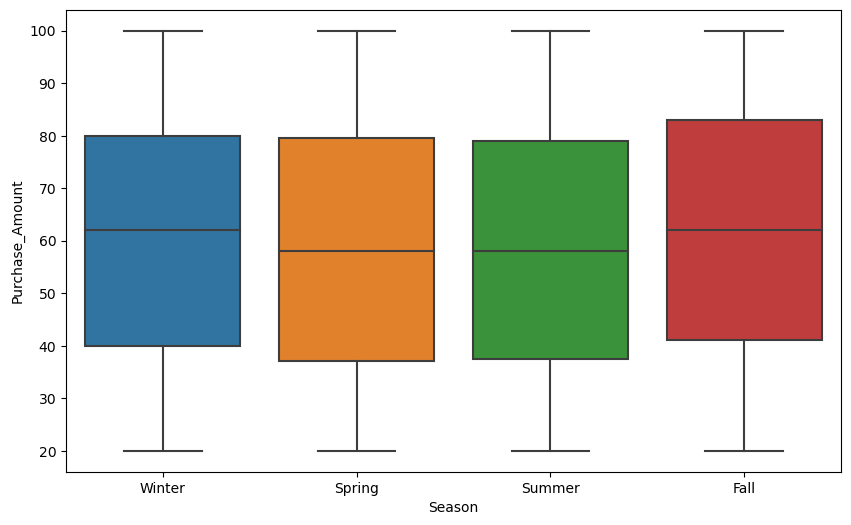

In [78]:
# Seasons by Purchase Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Purchase_Amount', data=df)